In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
#to avoid unicode error, use 'unicode_escape'.

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [48]:
df.shape

(11251, 15)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [50]:
df.drop(['Status', 'unnamed1'], inplace = True, axis = 1)

In [51]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [52]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [53]:
df.dropna(inplace = True)
df.shape

(11239, 13)

In [54]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [55]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

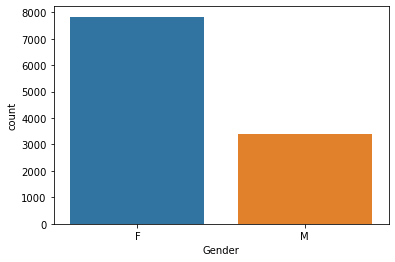

In [56]:
sns.countplot(data = df, x = 'Gender')

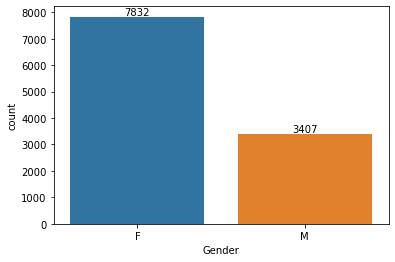

In [57]:
## I need the exact numbers representing each bar.

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [58]:
df.groupby('Gender')['Amount'].sum()

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64

In [59]:
## Using the columns names separately. 

df.groupby(['Gender'], as_index = False)['Amount'].sum()

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

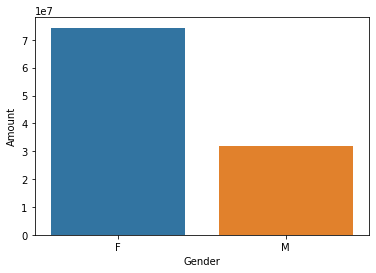

In [60]:
sales_by_gender = df.groupby(['Gender'], as_index = False)['Amount'].sum()

sns.barplot(data = sales_by_gender, x = 'Gender', y = 'Amount')

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Age Group', ylabel='count'>

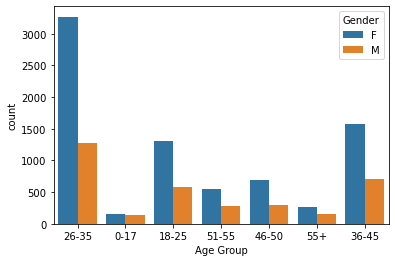

In [62]:
sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

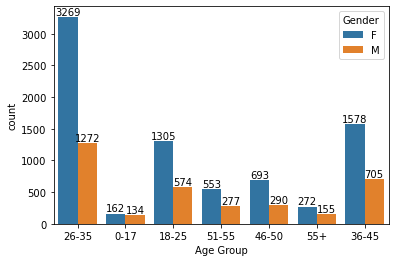

In [63]:
ax1 = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax1.containers:
    ax1.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

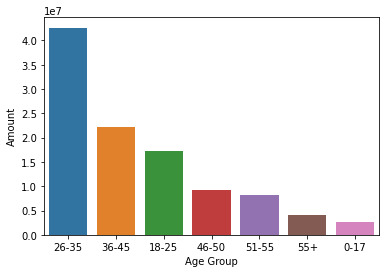

In [64]:
sales_by_agegroup = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales_by_agegroup, x = 'Age Group', y = 'Amount')

In [65]:
sales_by_agegroup

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


##### We can see that the highest purchase is made by the people of age group between 26 and 35.
##### The next is made by the people of age group between 36 and 45. The third comprises of youths aged between 18 and 25. We can also see many teens in the list- although they have spent the least.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Bihar'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

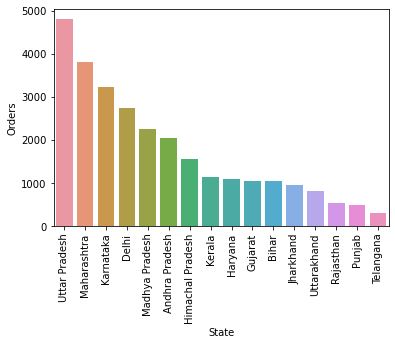

In [66]:
orders_by_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

sns.barplot(data = orders_by_state, x = 'State', y = 'Orders')

plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels by 90 degrees and set font size to 10


##### Kerala, Harayana, Gujarat, Bihar and Jharkhand have almost the same number of orders. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Kerala'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

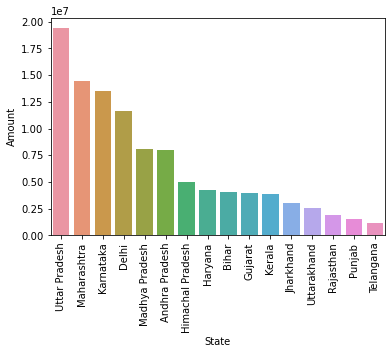

In [67]:
amount_by_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = amount_by_state, x = 'State', y = 'Amount')

plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels by 90 degrees and set font size to 10


##### Revenue generated from Himachal Pradesh, Harayana, Bihar, Gujarat, Kerala is almost same.

In [92]:
grouped_df = df.groupby('State', as_index=False).agg({'Amount': 'sum', 'Orders': 'sum'})
grouped_df

## Aggregating amount and orders to see how much each state accounts to.

,State,Amount,Orders
0,Andhra Pradesh,8037146.99,2051
1,Bihar,4022757.00,1062
2,Delhi,11603819.45,2740
3,Gujarat,3946082.00,1066
4,Haryana,4220175.00,1109
5,Himachal Pradesh,4963368.00,1568
6,Jharkhand,3026456.00,953
7,Karnataka,13523540.00,3240
8,Kerala,3894491.99,1137
9,Madhya Pradesh,8101142.00,2252


In [93]:
grouped_df['avg_amount_per_order'] = grouped_df['Amount']/grouped_df['Orders']
grouped_df.sort_values(by = 'avg_amount_per_order', ascending = False, inplace = True)
grouped_df


,State,Amount,Orders,avg_amount_per_order
2,Delhi,11603819.45,2740,4234.970602
7,Karnataka,13523540.00,3240,4173.932099
14,Uttar Pradesh,19374968.00,4807,4030.573747
0,Andhra Pradesh,8037146.99,2051,3918.647972
4,Haryana,4220175.00,1109,3805.387737
1,Bihar,4022757.00,1062,3787.906780
10,Maharashtra,14427543.00,3810,3786.756693
3,Gujarat,3946082.00,1066,3701.765478
13,Telangana,1151490.00,312,3690.673077
9,Madhya Pradesh,8101142.00,2252,3597.309947


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Karnataka'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Andhra\xa0Pradesh'),
  Text(4, 0, 'Haryana'),
  Text(5, 0, 'Bihar'),
  Text(6, 0, 'Maharashtra'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Telangana'),
  Text(9, 0, 'Madhya Pradesh'),
  Text(10, 0, 'Rajasthan'),
  Text(11, 0, 'Kerala'),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Himachal Pradesh'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Uttarakhand')])

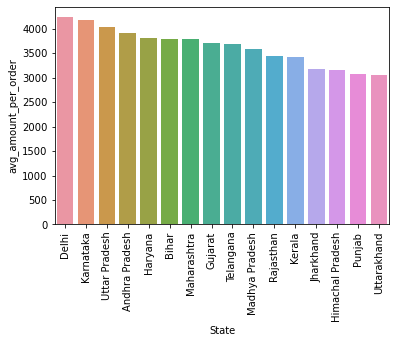

In [94]:
sns.barplot(data = grouped_df, x = 'State', y = 'avg_amount_per_order')
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels by 90 degrees and set font size to 10

In [96]:
grouped_df.describe()

,Amount,Orders,avg_amount_per_order
count,1.600000e+01,16.000000,16.000000
mean,6.640571e+06,1748.812500,3629.780355
std,5.403258e+06,1302.719833,376.060603
min,1.151490e+06,312.000000,3059.398058
25%,2.900078e+06,920.750000,3362.854761
50%,4.121466e+06,1123.000000,3696.219278
75%,8.976811e+06,2374.000000,3833.702795
max,1.937497e+07,4807.000000,4234.970602


##### Telangana state has the least number of orders at 312, while UP has 4807 which is the highest. The average amount spent for an order is INR 3630. While UP has the most number of orders and accounts for the highest revenue, the average amount spent is much less than Delhi and Karnataka. A similar trend is found in Maharashtra too which places it at 7th position. Delhi is ranked 4th in the first two scenarios, but the average is the highest.

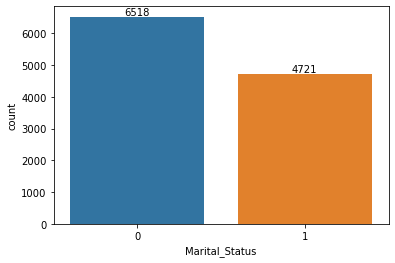

In [80]:
ax = sns.countplot(data = df, x = 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

##### Most orders are placed by married people.

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

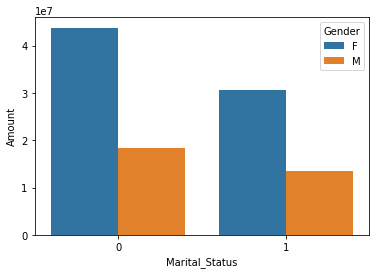

In [98]:
sales_status = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales_status, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

##### Further breaking down, married women have spent more than married men. Women have spent more than twice than what men have spent. It's the same scenario while comparing married and unmarried women and men separately.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Govt'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Food Processing'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Banking'),
  Text(8, 0, 'Retail'),
  Text(9, 0, 'IT Sector'),
  Text(10, 0, 'Aviation'),
  Text(11, 0, 'Hospitality'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Chemical')])

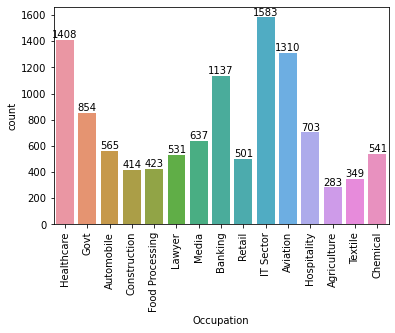

In [83]:
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xticks(rotation=90, fontsize=10)

##### The top three orders are from IT sector, Healthcare and Aviation industries.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

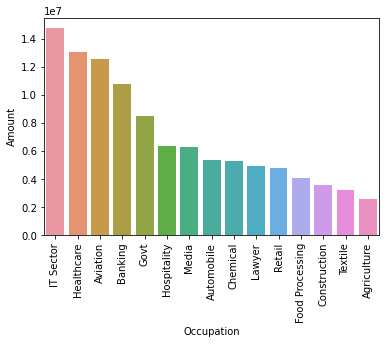

In [86]:
sales_by_occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales_by_occupation, x = 'Occupation', y = 'Amount')
plt.xticks(rotation=90, fontsize=10)

##### The order is the same when it comes to the amount spent as well. the only thing we notice is retail industry makes more orders but accounts for less money.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

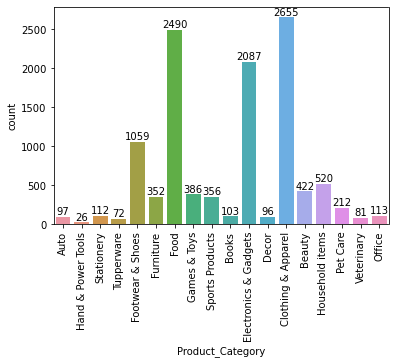

In [87]:
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xticks(rotation=90, fontsize=10)

##### The top four product cartegories account for more than two-thirds of the entire orders. It's no surprise that people buy clothes and footwear during the festival, but also tend to purchase electronic items too. Food being the second most product bought- one can assume most of it being sweets.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

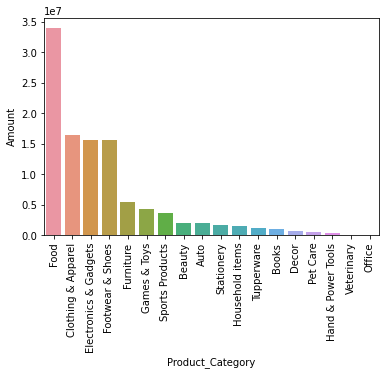

In [100]:
sales_by_occupation = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales_by_occupation, x = 'Product_Category', y = 'Amount')
plt.xticks(rotation=90, fontsize=10)

In [103]:
sales_by_occupation

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


In [122]:
sales_by_occupation.iloc[:4].sum()


Product_Category    FoodClothing & ApparelElectronics & GadgetsFoo...
Amount                                                    81647957.95
dtype: object

In [123]:
sales_by_occupation.iloc[4:].sum()

Product_Category    FurnitureGames & ToysSports ProductsBeautyAuto...
Amount                                                    24601174.48
dtype: object

##### When it comes to sales, food has significantly generated the highest sales than all the other products. Food alone accounts for 32% of revenue. The top four product categories generate more than two-thirds of the entire revenue. Office supplies are the least sold.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'P00265242'),
  Text(1, 0, 'P00110942'),
  Text(2, 0, 'P00237542'),
  Text(3, 0, 'P00184942'),
  Text(4, 0, 'P00114942'),
  Text(5, 0, 'P00025442'),
  Text(6, 0, 'P00117942'),
  Text(7, 0, 'P00145042'),
  Text(8, 0, 'P00044442'),
  Text(9, 0, 'P00110842'),
  Text(10, 0, 'P00110742'),
  Text(11, 0, 'P00058042'),
  Text(12, 0, 'P00216342'),
  Text(13, 0, 'P00028842'),
  Text(14, 0, 'P00059442'),
  Text(15, 0, 'P00106042'),
  Text(16, 0, 'P00080342'),
  Text(17, 0, 'P00112542'),
  Text(18, 0, 'P00251242'),
  Text(19, 0, 'P00148642')])

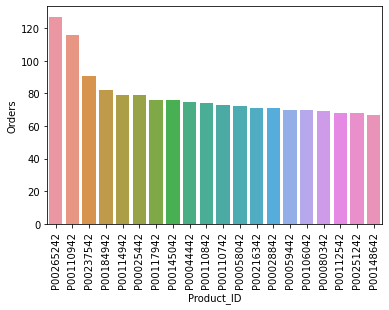

In [90]:
sales_by_occupation = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(20)

sns.barplot(data = sales_by_occupation, x = 'Product_ID', y = 'Orders')
plt.xticks(rotation=90, fontsize=10)

<AxesSubplot:xlabel='Product_ID'>

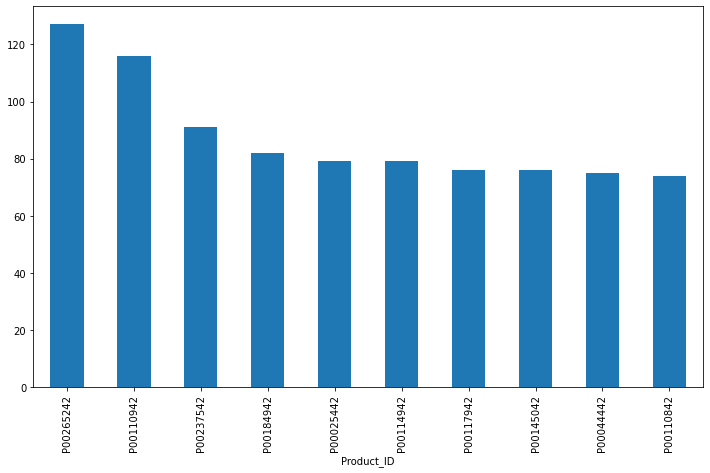

In [91]:
fig1, ax1 = plt.subplots(figsize = (12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

#### Married women working in IT, Healthcare, Aviation and Banking sectors have ordered more clothes, electronics and food and have also generated huge income for the company. We can focus on the same products the next year and also try to accomodate some more products which have performed poorly this time by introducing attractive discounts and offers.